## Imported Libraries

In [92]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import * 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Data Importing

In [93]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [95]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [96]:
df["Class"].value_counts() ## count of each class class 0:not fraud class 1:fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [97]:
df.drop(columns=["Time"],inplace=True) #dropping irrelevant columns

## Data Visualisation

### Countplot

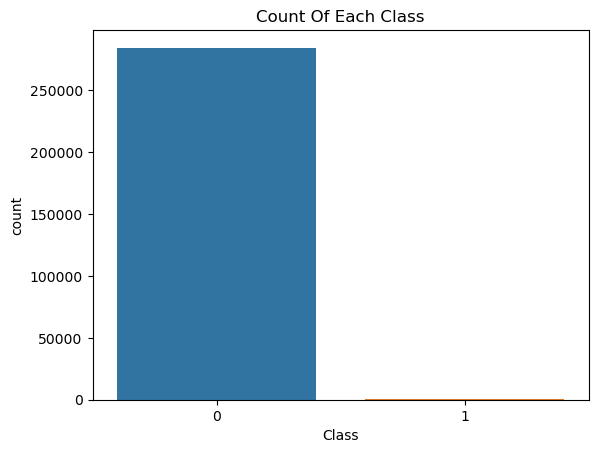

In [99]:
sns.countplot(data=df,x="Class") 
plt.xlabel("Class")  
plt.title("Count Of Each Class")
plt.show()

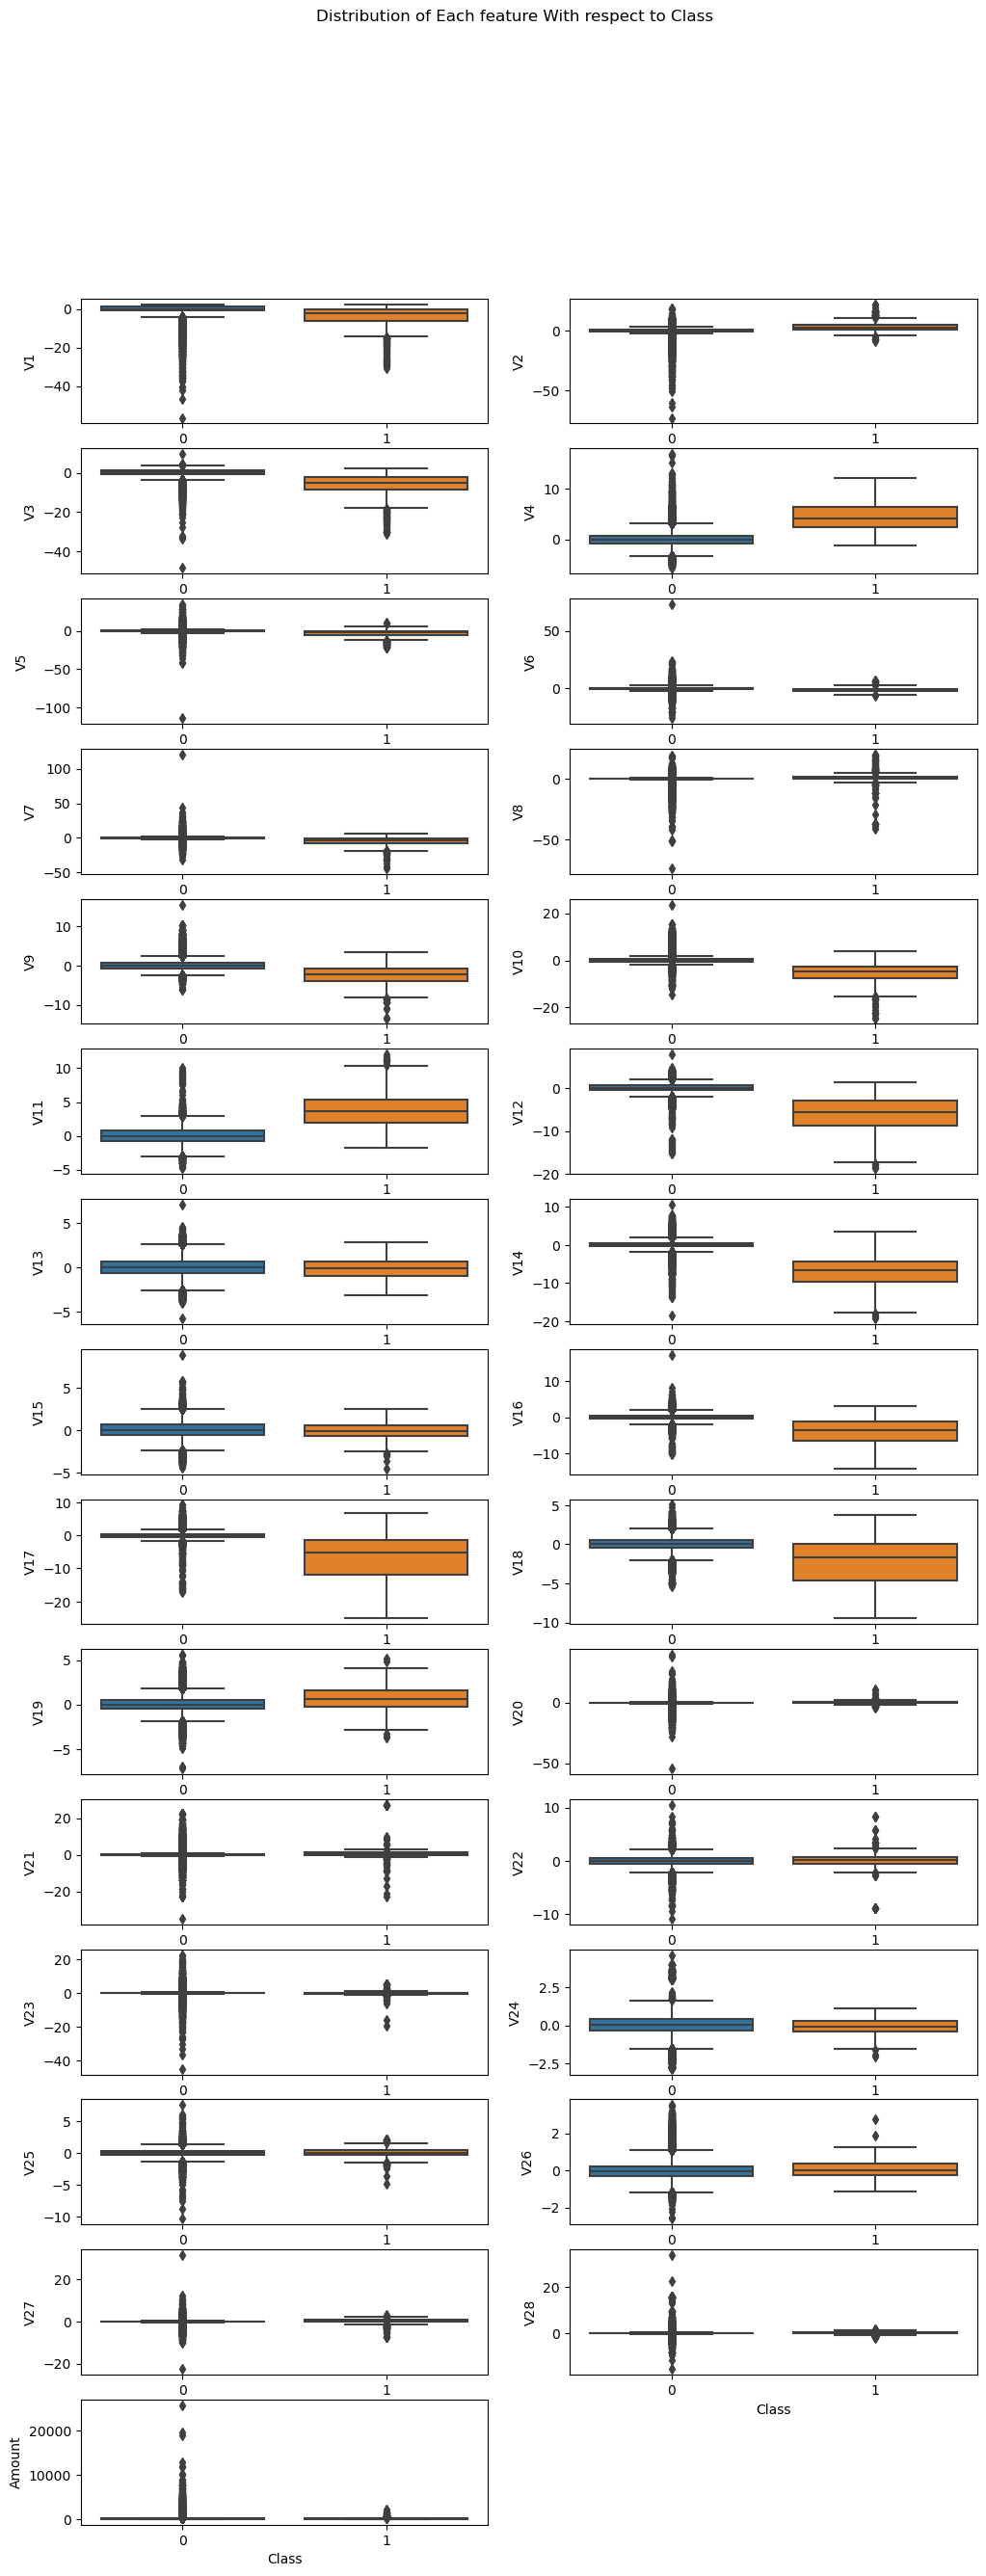

In [100]:
plt.figure(figsize=(12,30))
for i in range(len(df.columns[:-1])): 
    plt.subplot(15,2,i+1) 
    sns.boxplot(data=df,x="Class",y=df.columns[i]) 
    plt.xlabel("Class")
    plt.ylabel(df.columns[i]) 
plt.suptitle("Distribution of Each feature With respect to Class")
plt.show()

## Splitting Into  Independent And Dependent

In [102]:
X=df.drop(columns=["Class"])
Y=df["Class"]

## Handling Imbalance in Dataset

In [103]:
over = RandomOverSampler(sampling_strategy=0.1) ##oversampling of minority class to 10 percent of majority class

X, Y = over.fit_resample(X, Y)

under = RandomUnderSampler(sampling_strategy=0.5) ##undersampling of majority class to double of minority class

X, Y = under.fit_resample(X, Y)

In [104]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88501,1.256199,-0.015231,-1.469229,-0.093911,2.128520,3.459439,-0.660356,0.902599,0.461278,-0.713639,...,0.048465,-0.234142,-0.584964,-0.130329,0.941959,0.706134,0.426656,0.003528,0.036224,12.31
84807,1.262341,-1.096335,0.423883,-2.014267,-1.653147,-1.197780,-0.674676,-0.220119,0.452068,-0.272370,...,-0.323636,-0.209095,-0.178084,-0.069648,0.407969,0.337494,0.049374,0.031902,0.038434,84.00
97938,-1.019416,0.892983,2.554140,0.088001,-0.687135,-0.169633,0.059203,0.250769,0.547284,-0.288450,...,0.230293,-0.126162,-0.054138,-0.247717,0.414720,0.265980,0.373439,0.406853,0.197174,6.15
149632,2.107930,0.884314,-3.052462,0.891838,1.474994,-1.466063,0.793091,-0.601352,1.142739,-1.457587,...,-0.103342,-0.205059,-0.074957,-0.043635,0.473321,0.407826,0.644806,-0.097949,-0.017922,0.76
167446,-4.081206,4.210278,-3.702101,-1.622145,-0.707424,-1.600606,-0.226312,1.901841,0.486932,1.836094,...,0.743669,0.144812,0.802195,0.073949,-0.377926,0.308770,0.095951,0.367524,0.033644,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312741,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,-6.246243,...,0.814710,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99
312742,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,-13.074068,...,-0.617296,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32
312743,-0.549615,2.219075,-3.522024,0.236995,1.087469,-1.235530,-0.279313,0.514361,-1.849927,-3.443819,...,0.126518,0.364130,0.210428,-0.366019,0.015803,0.349212,0.647302,0.171929,0.117188,0.76
312744,-3.291125,4.401194,-8.394212,4.453580,-4.790055,-4.240182,-9.219001,1.974030,-2.912943,-13.540168,...,1.490869,2.102343,0.597370,-0.328086,0.445752,0.585281,-0.399005,2.116004,1.050744,1.00


## Splitting Into Train And Test

In [105]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

## Normalizing the Amount Feature

In [106]:
s=StandardScaler() 
s.fit(Xtrain[["Amount"]]) 
Xtrain[["Amount"]]=s.transform(Xtrain[["Amount"]])
Xtest[["Amount"]]=s.transform(Xtest[["Amount"]])

In [107]:
Xtest

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
59339,1.081565,-0.197324,1.269098,0.988423,-0.964202,0.197829,-0.827832,0.273971,0.519871,0.104286,...,-0.041751,0.298042,0.800583,-0.146522,0.016106,0.359297,-0.254081,0.064217,0.034924,-0.222689
251307,1.940907,-0.042219,-2.232825,0.969944,1.216146,0.220378,0.573710,-0.147183,-0.060608,0.379721,...,-0.068813,0.072063,0.232911,-0.169036,-0.340259,0.572347,-0.485243,-0.035066,-0.063330,-0.091199
68622,-1.055285,-0.517861,1.397745,-0.164410,1.089642,-0.371035,-0.063665,-0.290042,0.198390,0.804747,...,0.191880,-0.091817,0.309676,-0.047165,-0.204277,-1.259140,0.859391,-0.155660,-0.040829,-0.272097
288173,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,-8.233721,...,1.667304,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,0.002552
44493,1.246459,-0.104977,1.195885,0.456817,-0.944511,-0.150986,-0.786540,0.067980,0.699206,-0.127696,...,-0.025217,0.189336,0.650376,-0.092310,-0.045236,0.276600,0.606735,0.018225,0.025884,-0.372150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187912,0.170441,-3.221042,-1.304388,1.108506,-1.671812,-0.718314,1.016768,-0.460760,1.042545,-0.732605,...,1.722228,0.196947,-1.304353,-0.335102,0.494916,-0.857502,-0.543803,-0.168154,0.129145,3.155289
17379,0.916294,0.126709,1.592857,2.496033,-0.106147,1.970609,-0.870624,0.689761,-0.139501,0.325648,...,-0.239875,0.167506,0.771314,0.181869,-0.608416,-0.049940,0.107558,0.120491,0.028344,-0.363334
142001,1.270714,-1.007221,-1.131349,-1.766264,1.318644,3.251478,-0.989989,0.773760,-0.932629,0.621832,...,0.399806,-0.087594,-0.746874,0.011269,0.984437,0.355902,-0.476826,-0.005675,0.033352,0.032601
197634,-0.720194,1.948263,-1.285300,1.045732,0.935134,-0.444224,1.381296,0.090668,-0.808065,-0.673463,...,-0.036311,0.075481,0.376680,-0.207190,0.499256,0.080252,-0.421799,0.098850,0.199481,-0.106917


## Model Building

### Logistic Regression

In [108]:
Lr=LogisticRegression()
Lr.fit(Xtrain,Ytrain) 
ypred=Lr.predict(Xtest)

In [109]:
accuracy_score(Ytest,ypred)

0.9577349199835864

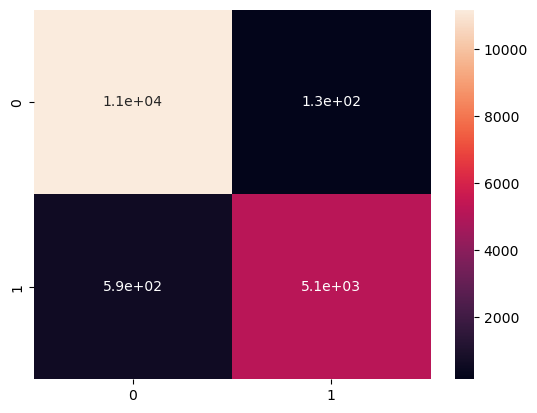

In [110]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True) 
plt.show()

In [111]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11321
           1       0.98      0.90      0.93      5738

    accuracy                           0.96     17059
   macro avg       0.96      0.94      0.95     17059
weighted avg       0.96      0.96      0.96     17059



### DecisionTreeClassifier

In [112]:
dt=DecisionTreeClassifier(criterion="entropy") 
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

In [113]:
accuracy_score(Ytest,ypred)

0.9988862184184302

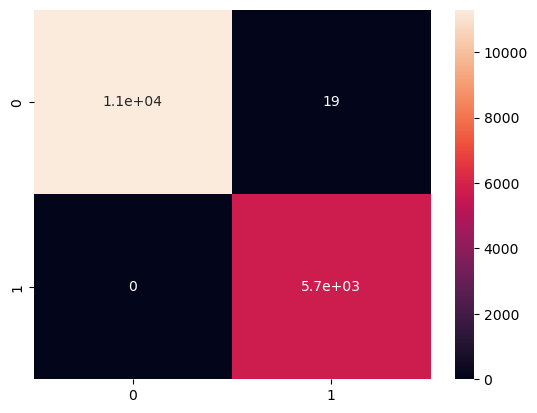

In [114]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True) 
plt.show()

In [115]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11321
           1       1.00      1.00      1.00      5738

    accuracy                           1.00     17059
   macro avg       1.00      1.00      1.00     17059
weighted avg       1.00      1.00      1.00     17059



### RandomForestClassifier

In [116]:
rf=RandomForestClassifier(criterion="entropy") 
rf.fit(Xtrain,Ytrain) 
ypred=rf.predict(Xtest)

In [117]:
accuracy_score(Ytest,ypred)

0.9999413799167595

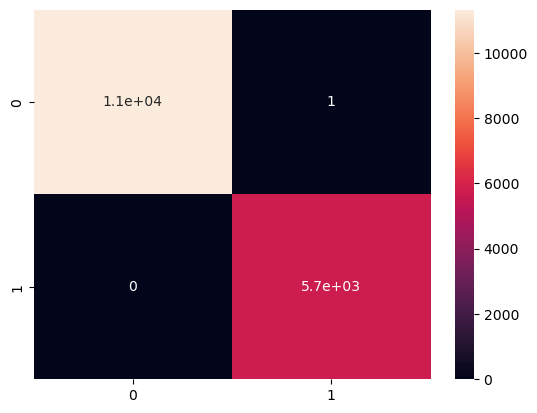

In [118]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True) 
plt.show()

In [119]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11321
           1       1.00      1.00      1.00      5738

    accuracy                           1.00     17059
   macro avg       1.00      1.00      1.00     17059
weighted avg       1.00      1.00      1.00     17059

